In [1]:
import os
os.chdir('..')

import matplotlib.pyplot as plt
import torch
import numpy as np

In [ ]:
%%bash
python -m src.compute_cka --batch_size 512 --model_x resnext --device cuda:0
python -m src.compute_cka --batch_size 512 --model_x clip-res --device cuda:0

In [2]:
def plt_matrix_heatmap(matrix, model_y, model_x, y_layers=None, x_layers=None):
    # Convert the CKA matr.
    # 3.0+.0ix to numpy for plotting
    matrix_np = matrix.numpy() * 100 
    
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(matrix_np, cmap='Blues', vmin=0, vmax=100)  
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("CKA Similarity (%)", rotation=-90, va="bottom", labelpad=None)
    
    if y_layers:
        y_labels = [layer.split('.')[-1].replace('layer', '') for layer in y_layers]
        ax.set_yticks(np.arange(len(y_labels)))
        ax.set_yticklabels(y_labels)
    
    if x_layers:
        x_labels = [layer.split('.')[-1].replace('layer', '') for layer in x_layers]
        ax.set_xticks(np.arange(len(x_labels)))
        ax.set_xticklabels(x_labels, ha="right")
    
    ax.invert_yaxis()
    
    for i in range(len(y_layers) if y_layers else matrix_np.shape[0]):
        for j in range(len(x_layers) if x_layers else matrix_np.shape[1]):
            value = matrix_np[i, j]
            bg_color = im.cmap(im.norm(value))
            brightness = (0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2])
            text_color = 'white' if brightness < 0.6 else 'black'
            ax.text(j, i, f'{value:.1f}', ha="center", va="center", color=text_color)
    
    model_names = {
        'clip-res': 'CLIP-RN50',
        'cvcl-resnext': 'CVCL-ResNeXt50',
        'resnext': 'ResNeXt50'
    }
    
    y_model_name = model_names.get(model_y, model_y)
    x_model_name = model_names.get(model_x, model_x)
    
    ax.set_title(f"CKA Similarity")
    ax.set_ylabel(f"{y_model_name}")
    ax.set_xlabel(f"{x_model_name}")
    
    plt.tight_layout()
    return fig

### Fig 9 Left: CVCL vs. CLIP

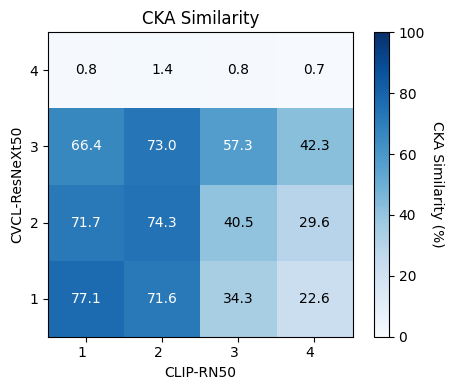

In [3]:
cka_data = torch.load('experiments/CKA/similarity_matrix/mat_cvcl-resnext_clip-res_imagenet_val_20250329_220411.pt')

matrix = cka_data['matrix']
model_y = cka_data['model_y']  
model_x = cka_data['model_x']  
y_layers = cka_data['model_y_layers']  
x_layers = cka_data['model_x_layers'] 

plt_matrix_heatmap(matrix, model_y, model_x, y_layers, x_layers)
plt.show()

### Fig 9 Right: CVCL vs. ResNeXt (ImageNet)

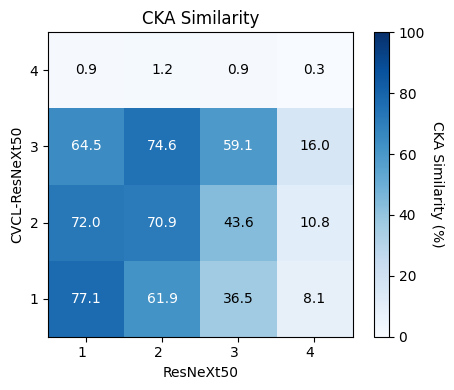

In [4]:
cka_data = torch.load('experiments/CKA/similarity_matrix/mat_cvcl-resnext_resnext_imagenet_val_20250329_212855.pt')

matrix = cka_data['matrix']
model_y = cka_data['model_y']  
model_x = cka_data['model_x']  
y_layers = cka_data['model_y_layers']  
x_layers = cka_data['model_x_layers'] 

plt_matrix_heatmap(matrix, model_y, model_x, y_layers, x_layers)
plt.show()